# Case study on Supervised learning
Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read the dataset to the python environment.

In [2]:
data=pd.read_excel(r'C:\Users\Admin\Downloads\iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2.Do necessary pre-processing steps

In [161]:
data.shape

(150, 5)

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [165]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [166]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are missing values in the columns SL,SW and PL

# Handling the missing values

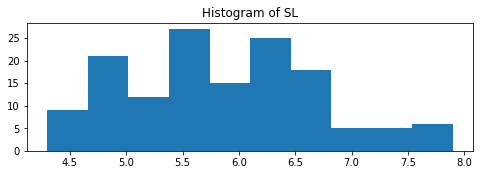

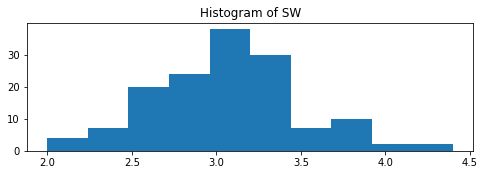

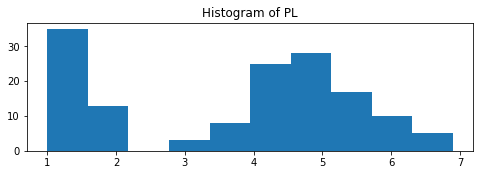

In [3]:
plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.hist(data['SL'])
plt.title('Histogram of SL')
plt.show()
plt.figure(figsize=(8,8))
plt.subplot(3,1,2)
plt.hist(data['SW'])
plt.title('Histogram of SW')
plt.show()
plt.figure(figsize=(8,8))
plt.subplot(3,1,3)
plt.hist(data['PL'])
plt.title('Histogram of PL')
plt.show()

None of these graphs are of a normal distribution.Therefore we will be using meadian to fill the missing values

# Handling the missing values in 'SL'.'SW','PL',PW'

In [3]:
data['SL']=data['SL'].fillna(data['SL'].median())
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL']=data['PL'].fillna(data['PL'].median())

In [4]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Checking and handling outliers in dataset

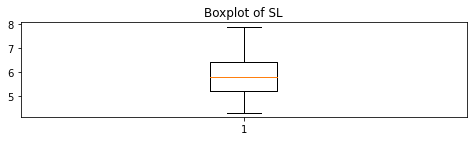

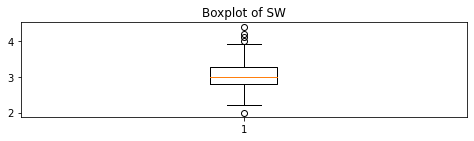

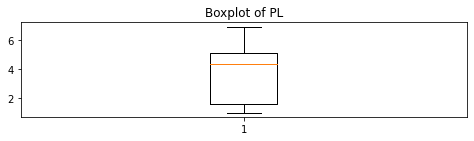

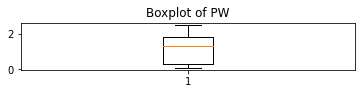

In [5]:
#we will check the presence of outliers using boxplot for 'SL'.'SW','PL',PW'
plt.figure(figsize=(8,8))
plt.subplot(4,1,1)
plt.boxplot(data['SL'])
plt.title('Boxplot of SL')
plt.show()
plt.figure(figsize=(8,8))
plt.subplot(4,1,2)
plt.boxplot(data['SW'])
plt.title('Boxplot of SW')
plt.show()
plt.figure(figsize=(8,8))
plt.subplot(4,1,3)
plt.boxplot(data['PL'])
plt.title('Boxplot of PL')
plt.show()
plt.subplot(4,1,4)
plt.boxplot(data['PW'])
plt.title('Boxplot of PW')
plt.show()


Outliers are present only in the column SW

In [8]:
#handling the outliers in 'SW'
#finding the quartile values using percentile para
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')   
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)  

2.8
3.0
3.25


In [9]:
data['SW'].median()

3.0

In [10]:
#finding IQR
IQR=Q3-Q1

In [11]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)          
print(up_lim)

2.1249999999999996
3.9250000000000003


In [12]:
#removing outlier using for loop
outlier=[]
for x in data['SW']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [13]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [14]:
ind1=data['SW']>up_lim
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [15]:
data=data.drop(data.loc[ind1].index)

In [16]:
ind2=data['SW']<low_lim
data.loc[ind2].index

Int64Index([60], dtype='int64')

In [17]:
data=data.drop(data.loc[ind2].index)

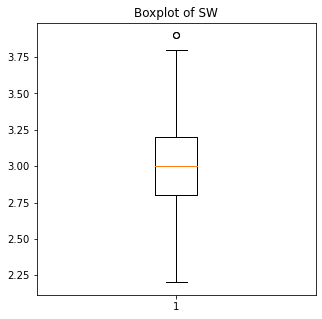

In [18]:
#plotting the box plot to check the presence of any more outliers
plt.figure(figsize=(5,5))
plt.boxplot(data['SW'])
plt.title('Boxplot of SW')
plt.show()

In [19]:
#checking the new outliers
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')   
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)  

2.8
3.0
3.2


In [20]:
#finding IQR
IQR=Q3-Q1

In [21]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)          
print(up_lim)

2.1999999999999993
3.8000000000000007


In [22]:
#removing outlier using for loop
outlier=[]
for x in data['SW']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [23]:
outlier

[3.9, 3.9]

In [24]:
ind3=data['SW']>up_lim
data.loc[ind3].index

Int64Index([5, 16], dtype='int64')

In [25]:
data=data.drop(data.loc[ind3].index)

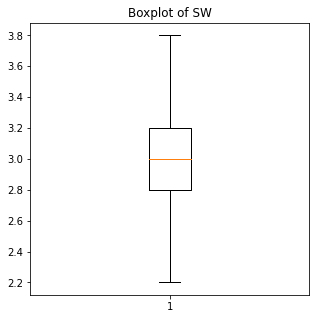

In [26]:
#hecking whether the are more outliers
plt.figure(figsize=(5,5))
plt.boxplot(data['SW'])
plt.title('Boxplot of SW')
plt.show()

Insight-There are no more outliers

# 3.Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [27]:
data.Classification.nunique()

3

In [28]:
#split data into dependent and independent data
y=pd.DataFrame(data['Classification'])
X=data.drop(['Classification'],axis=1)

In [29]:
#to split data into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3,test_size=0.3)

In [34]:
X_train.shape

(100, 4)

In [31]:
y_train.shape

(100, 1)

In [32]:
X_test.shape

(43, 4)

In [33]:
y_test.shape

(43, 1)

In [41]:
#building model(with random forest)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

<ipython-input-41-9f16490c532b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [42]:
#evaluate the perormance of the model
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score

In [43]:
confusion_matrix(y_test,y_pred)


array([[16,  0,  0],
       [ 0, 12,  2],
       [ 0,  3, 10]], dtype=int64)

In [44]:
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,pos_label='positive',average='micro'))
print('accuracy:',accuracy_score(y_test,y_pred))

Precision Score :  0.8837209302325582
Recall Score :  0.8837209302325582
accuracy: 0.8837209302325582


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [45]:
#building model(with gradient boosting)
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred1=gb.predict(X_test)
print("Precision Score : ",precision_score(y_test, y_pred1, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred1,pos_label='positive',average='micro'))
print('accuracy:',accuracy_score(y_test,y_pred1))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Precision Score :  0.9069767441860465
Recall Score :  0.9069767441860465
accuracy: 0.9069767441860465


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [46]:
#building model(with Decision Tree)
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred2=dt_model.predict(X_test)
print("Precision Score : ",precision_score(y_test, y_pred2, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred2,pos_label='positive',average='micro'))
print('accuracy:',accuracy_score(y_test,y_pred2))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


Precision Score :  0.9069767441860465
Recall Score :  0.9069767441860465
accuracy: 0.9069767441860465


In [47]:
#building model(with SVM)
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_pred3=dt_model.predict(X_test)
print('accuracy:',accuracy_score(y_test,y_pred3))
print("Precision Score : ",precision_score(y_test, y_pred3, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred3,pos_label='positive',average='micro'))

accuracy: 0.9069767441860465
Precision Score :  0.9069767441860465
Recall Score :  0.9069767441860465


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [48]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
print('accuracy:',accuracy_score(y_test,y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,pos_label='positive',average='micro'))


C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[02:03:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.9534883720930233
Precision Score :  0.9534883720930233
Recall Score :  0.9534883720930233


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
